# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: The t-test family
### VIDEO: Two-samples t-test
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

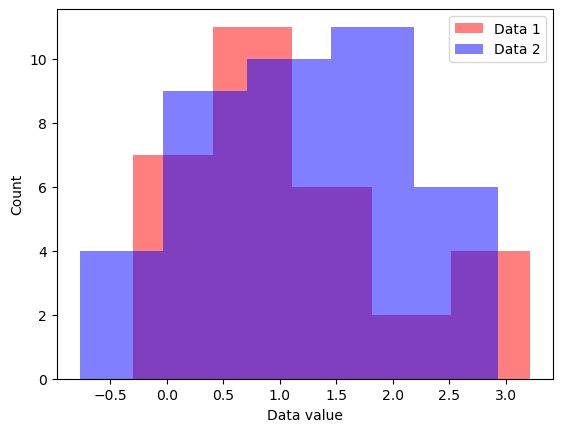

In [2]:
## generate the data

rng = np.random.default_rng()
# parameters
n1 = 30   # samples in dataset 1
n2 = 40   # ...and 2
mu1 = 1   # population mean in dataset 1
mu2 = 1.2 # population mean in dataset 2

# generate the data
data1 = mu1 + rng.standard_normal(size=n1)
data2 = mu2 + rng.standard_normal(size=n2)
# data1 = mu1 + np.random.randn(n1)
# data2 = mu2 + np.random.randn(n2)

# show their histograms
# 4 параметр в color отвечает за прозрачность
plt.hist(data1, bins='fd', color=[1, 0, 0, 0.5], label='Data 1')
plt.hist(data2, bins='fd', color=[0, 0, 1, 0.5], label='Data 2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [3]:
## now for the t-test
# Calculates the T-test for the means of TWO INDEPENDENT samples of scores.
# If equal_var=True, perform a standard independent 2 sample test 
# that assumes equal population variances (в данном случае дисперсия равна 1).
t, p = stats.ttest_ind(data1, data2, equal_var=True)

df = n1 + n2 - 2
print(f't({df})={np.round(t, 3)}, p={np.round(p, 3)}')

t(68)=-0.584, p=0.561


In [4]:
## a 2D space of t values

# ranges for t-value parameters
meandiffs = np.linspace(-3, 3, 80)
pooledvar = np.linspace(0.5, 4, 100)

# initialize output matrix
allTvals = np.zeros((len(meandiffs), len(pooledvar)))

# group sample size
n1 = 40
n2 = 30

# degrees of freedom
df = n1 + n2 - 2

# loop over the parameters...
for meani in range(len(meandiffs)):
    for vari in range(len(pooledvar)):
        # t-value denominator
        s = np.sqrt(((n1-1)*pooledvar[vari] + (n2-1)*pooledvar[vari]) / df)
        t_den = s * np.sqrt(1/n1 + 1/n2)        
        # t-value in the matrix
        allTvals[meani, vari] = meandiffs[meani] / t_den

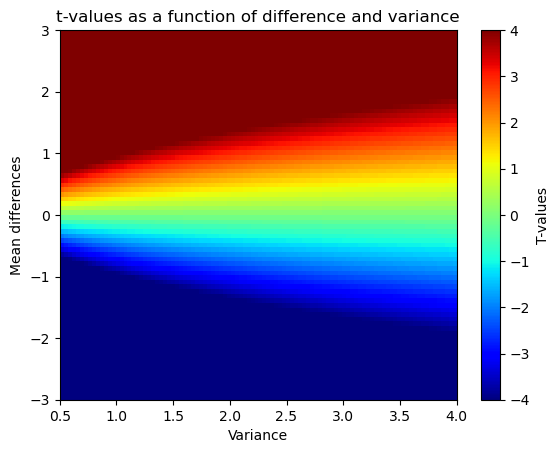

In [5]:
# vmin, vmax: when using scalar data and no explicit norm, vmin and vmax define the data range
# that the colormap covers. 
# Прикол в том, что imshow по умолчанию задаёт начало координат в верхнем левом углу, а не в нижнем левом.
# Для переопределения используем команду origin='lower' 
plt.imshow(allTvals, vmin=-4, vmax=4, cmap='jet', origin='lower', 
           extent=[pooledvar[0], pooledvar[-1], meandiffs[0], meandiffs[-1]], aspect='auto')
plt.xlabel('Variance')
plt.ylabel('Mean differences')
plt.colorbar(label='T-values')
plt.title('t-values as a function of difference and variance')
plt.show()